Libraries imports:

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



Read attacks.csv from local folder:

In [6]:
data = pd.read_csv(r'C:\Users\pombo\OneDrive\Escritorio\Ironhack\Labs\Day10Proy\pombo7676-Proyecto-Semana-2-Sharks-Inigo-Larrea\Data\attacks.csv', encoding='latin1' )

data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


How many rows and columns does my DB have?

In [7]:
data.shape

(25723, 24)

Which columns do I have in my DB?

In [9]:
columns = data.columns

columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

Type of data and non-null values of my DB:

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

From the results given by the previous table we can imagine that the useful data rows will be around 6300...as most of the columns have around those non-null values. 

    Later on I will investigate the reason for this data.info()

Find columns that have excesive null values. Could happen that some random values where typped in by mistake!!

Percentage of null values per column:

In [19]:
nan_cols = data.isna().mean()*100  # serie con los valores nulos por columna en porcentaj

nan_cols

Case Number               66.170353
Date                      75.500525
Year                      75.508300
Type                      75.516075
Country                   75.694903
Area                      77.269370
Location                  77.599813
Activity                  77.615364
Name                      76.316915
Sex                       77.697003
Age                       86.506240
Injury                    75.609377
Fatal (Y/N)               77.595926
Time                      88.539439
Species                   86.533453
Investigator or Source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
Unnamed: 22               99.996112
Unnamed: 23               99.992225
dtype: float64

From the previous data we can say Unnamed columns are practicaly full of null values and by these means we can drop these colunmns as they don't give us significant information about the Shark attacks...

    Drop columns with more than 90% Null Values:

In [27]:
nan_cols_90 = []

# Delete columns containing either 90% or more than 90% NaN Values

perc = 90.0
min_count =  int(((100-perc)/100)*data.shape[0] + 1)
data = data.dropna( axis=1, thresh=min_count)


data.head()


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0



I want to see in a graphic how are the Nulls distributed in our dataframe:


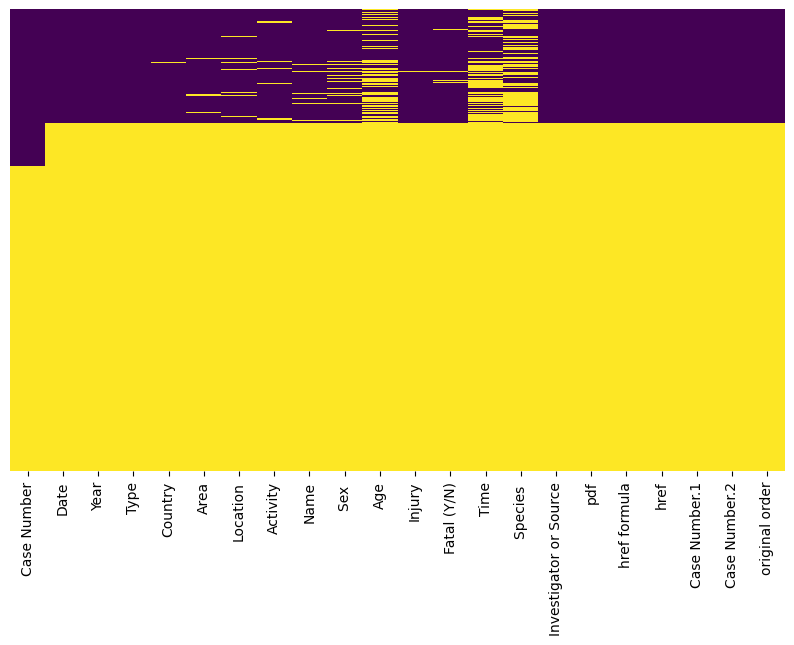

In [28]:
plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

sns.heatmap(data.isna(),  # mapa de calor
           yticklabels=False,
           cmap='viridis',
           cbar=False)

plt.show()



From the previous graphic we can come into conclusion that something strange happened in 'Case Number' column that has values where the other columns do not have any value...I am going to investigate visually by printing values around row 6300 to see exactly what is happening there and if I can drop several rows that have no useful information:



In [32]:
pd.set_option('display.max_columns', None)

data[6290:6320]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6290,ND.0012,Before 19-Jul-1913,0.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Wading,a young Scotsman,M,NaN,"FATAL, leg stripped of flesh",Y,NaN,NaN,"Rural New Yorker, 7/19/1913",ND-0012-Durban-Scotsman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0012,ND.0012,13.0
6291,ND.0011,Before 1911,0.0,Unprovoked,ASIA?,NaN,NaN,Swimming,Mr. Masury,M,NaN,Foot severed,N,NaN,NaN,"Ref. J. T. Dubois in N.Y. Sun, 3/19/1911",ND-0011-Masury.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0011,ND.0011,12.0
6292,ND.0010,Circa 1862,0.0,Unprovoked,USA,Hawaii,Puna,NaN,"A ""chiefess""",F,NaN,Ankle bitten,N,NaN,NaN,Captain W. Young,ND-0010-Puna Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0010,ND.0010,11.0
6293,ND.0009,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,boy,M,NaN,"FATAL, knocked overboard by tail of shark & ca...",Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0009-boy-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0009,ND.0009,10.0
6294,ND.0008,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0008-Fisherman2-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0008,ND.0008,9.0
6295,ND.0007,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,Blue pointers,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0007 - Fisherman-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0007,ND.0007,8.0
6296,ND.0006,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,NaN,FATAL,Y,NaN,Said to involve a grey nurse shark that leapt ...,"L. Becke in New York Sun, 9/9/1906; L. Schultz...",ND-0006-ArabBoy-Prymount.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0006,ND.0006,7.0
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0


From the previous table we can clearly see that a row of zeros were entered probably by mistake and that those rows from 6302 till the end have no useful information...

The best idea would be to drop those rows so the DB is smaller and takes less space...


In [34]:
data.drop(data.index[6302::], inplace=True)

data.shape

(6302, 22)

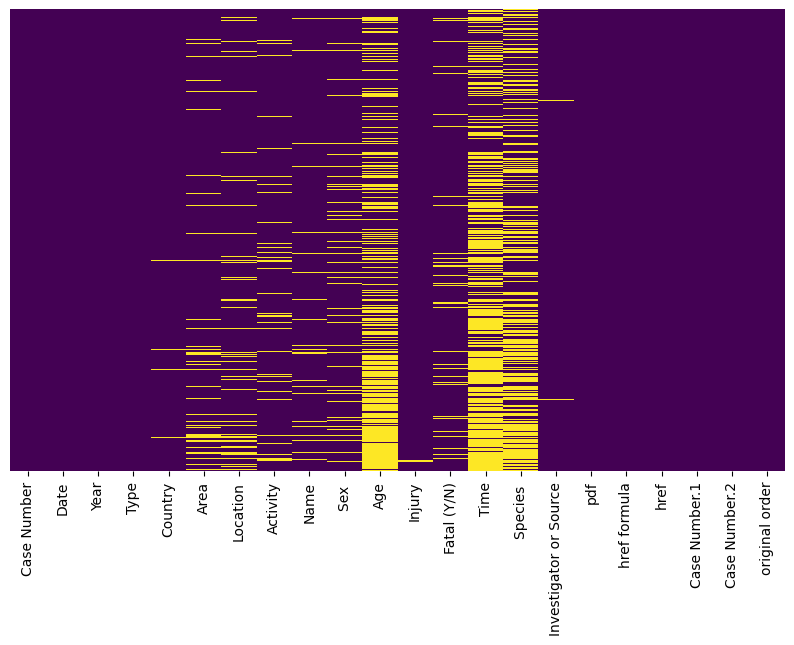

In [35]:
plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

sns.heatmap(data.isna(),  # mapa de calor
           yticklabels=False,
           cmap='viridis',
           cbar=False)

plt.show()

In [37]:
nan_cols = data.isna().sum()  # serie con los valores nulos por columna en porcentaj

nan_cols

Case Number                  1
Date                         0
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
dtype: int64

In [41]:
data[data['Case Number'].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
5488,NaN,Reported 06-Sep-1905,1905.0,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,NaN,Lacerations to leg from hooked shark PROVOKED ...,N,NaN,NaN,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.06.R,1905.09.06.R,815.0


VOY A PROBAR A HACER UN DROP DUPLICATES PARA QUITARME TODAS ESAS FILAS CON VALORES ABSURDOS....